# IMDB REVIEW ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import re
import string
import time
import nltk
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os
import matplotlib.pyplot as plt

### Loading the data:
We are loading the data directly from the Kaggle dataset repository using the Kaggle CLI tool and saving it into a local directory.

In [2]:
os.makedirs('datasets', exist_ok=True)
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p datasets --unzip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv('IMDB Dataset.csv')

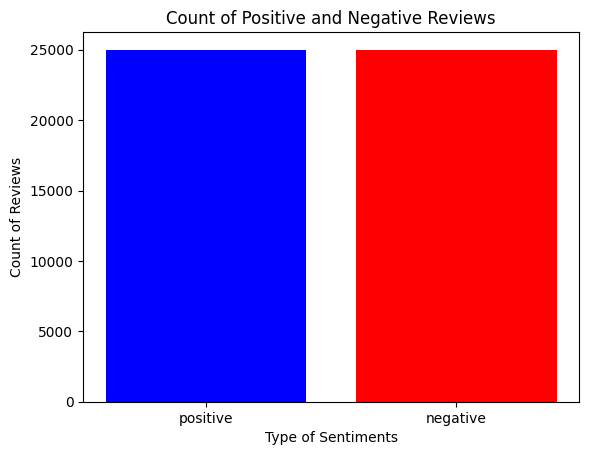

In [4]:
data = df['sentiment'].value_counts()
plt.bar(data.index, data.values, color=['blue', 'red'])
plt.title("Count of Positive and Negative Reviews")
plt.xlabel("Type of Sentiments")
plt.ylabel("Count of Reviews")
plt.show()

#### We realise that the dataset is balanced, good to proceed!

In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lithi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
stop_words = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.SnowballStemmer(language='english')

### Clean Reviews, Normalized: 
- Special Character Removal
- Case Normalization

In [7]:
def clean_text(feature):
    cleaned_text = []
    for review in tqdm(feature):
        review = re.sub('[^A-Za-z0-9:)()]+', ' ', review)  
        review = review.lower()  
        cleaned_text.append(review)
    return(cleaned_text)

### Tokenized and Stemmed:
The text is split into individual words or tokens and reduced to its root form using the Snowball Stemmer, simplifying the text while preserving meaning.

In [8]:
def tokenizer(txt):
    txt = ''.join([char for char in txt if char not in string.punctuation])
    return [stemmer.stem(token) for token in nltk.word_tokenize(txt.lower())]

In [9]:
df['cleaned_review'] = clean_text(df['review'])
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

100%|██████████| 50000/50000 [00:02<00:00, 20675.45it/s]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

In [23]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=nltk.corpus.stopwords.words('english'), max_features=2500)

In [17]:
import nltk
nltk_data_dir = 'd:\\apps\\Anaconda\\envs\\myenv\\nltk_data' 

nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     d:\apps\Anaconda\envs\myenv\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     d:\apps\Anaconda\envs\myenv\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
print("Using TfidfVectorizer...")
vectorizer.fit(x_train)
train_inputs = vectorizer.transform(x_train)
test_inputs = vectorizer.transform(x_test)

Using TfidfVectorizer...


In [25]:
model = LogisticRegression(max_iter=1000)
start_time = time.time()
model.fit(train_inputs, y_train)
elapsed_time = time.time() - start_time

In [26]:
y_preds = model.predict(test_inputs)
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy with TfidfVectorizer: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_preds))

Accuracy with TfidfVectorizer: 0.8861
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Saving the model

In [27]:
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Best model and vectorizer saved successfully.")

Best model and vectorizer saved successfully.


In [38]:
loaded_model = joblib.load('best_logistic_regression_model.pkl')
loaded_vectorizer = joblib.load('best_vectorizer.pkl')
print("Best model and vectorizer loaded successfully.")

Best model and vectorizer loaded successfully.


In [39]:
sample_text = ["This movie was fantastic! I loved the plot and the acting."]
sample_vectorized = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_vectorized)
print(f"Prediction for sample text: {'Positive' if prediction[0] == 1 else 'Negative'}")

Prediction for sample text: Positive


In [40]:
sample_text = ["The movie was the worst."]
sample_vectorized = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_vectorized)
print(f"Prediction for sample text: {'Positive' if prediction[0] == 1 else 'Negative'}")

Prediction for sample text: Negative
